**NLP Analysis - Reviews Data**

# Introduction

In the following notebook, I will be performing an NLP analysis of San Francisco Airbnb review data from December 2018 - December 2019.

My goal in this analysis is to find insights to answer the following questions:
- What are some things that hosts makes a positive user experience? What about a negative user experience? What are the commonalities among them within the review data?
- How would you advise a first time Airbnb host to ensure a great user experience? What are some goods/additional services a new host can provide to help ensure continued business on the Airbnb platform?

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [22]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in data**

In [23]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in data
df = pd.read_csv(path + '/2020_0208_Reviews_Processed_NLP.csv',sep=',',
                 parse_dates=['date'])

**Set preferences for notebook**

In [24]:
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth',500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

#Set style for plots
plt.style.use('Solarize_Light2')

## Preview data

In [25]:
print('Reviews data shape:', df.shape)
display(df.head())

Reviews data shape: (65049, 5)


,comments,date,sentiment_compound,label,word_count
0,"Our San Francisco stay with Sharna was very disappointing My husband has mobility problems, so I checked beforehand to find out if the stairs to her second-floor condo were steep. Sharna said no. But it turned out that her second floor condo was actually on the third floor and required my husband to climb 50 steps to get to our bedroom! Key problems: First, rang the doorbell (which didn’t work). After we banged for a while on the outside door, Sharna appeared. No smile or hello....",2013-08-02,-0.9907,negative,461
1,"The location was great, yes it did have a great view, but it was dirty. The first thing I do anywhere is pull back the top sheet. There was a bunch of crunchy things and hair on the sheets and pillow case. The top sheet was torn in several places and the pillow cases had holes in them. They were not changed. I had no place to stay so I brushed them off and spent two uncomfortable nights in the house. The bathtub/shower was dirty and had black mold around where the wall met the tub....",2013-11-01,-0.8452,negative,241
2,"Host was very friendly. The block where this Air BnB is, was fine, but Haight is still a bit unsavory.",2015-06-08,-0.5082,negative,20
3,"I have stayed in many airbnb, always met host, on arrival, questions answered etc,, that did not occur, and then lock issue, none complanied re the locks so then new locks placed, but arrived and noticed new lock , but no code given to us,, had to call host in late hours ,, all unnecessary hassle.",2016-06-26,-0.4215,negative,56
4,"Gabriels spot is small but great for the price & for a couple if your in town just for a couple nights. Quiet neighborhood up on the hill close enough to walk although I do suggest you take a car service home after cause some of those SF hills are brutal after a long day. Only thing that was kinda a bummer was the shower water pressure is non existent after a long day in the city. Overall though, nice small place to stay if you plan on being out in the city most of the time which you shou...",2016-01-26,-0.3297,negative,107


# Data Exploration

## Histogram of VADER sentiment scores

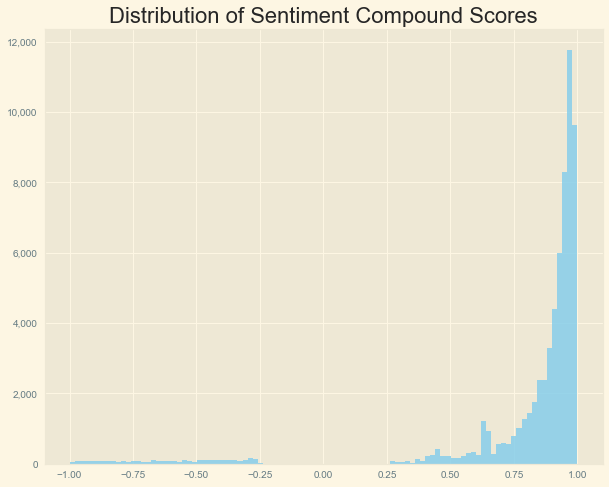

In [26]:
#Set plot
fig, ax = plt.subplots(figsize = (10,8))

#Plot hist of sentiment_compound scores
j = df.sentiment_compound.hist(ax = ax,bins = 100, color = 'skyblue', alpha = .85)

#Set plot aesthetics
j.set_title('Distribution of Sentiment Compound Scores', fontsize = 22)
ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()]);

## Positive, neutral, and negative review label counts

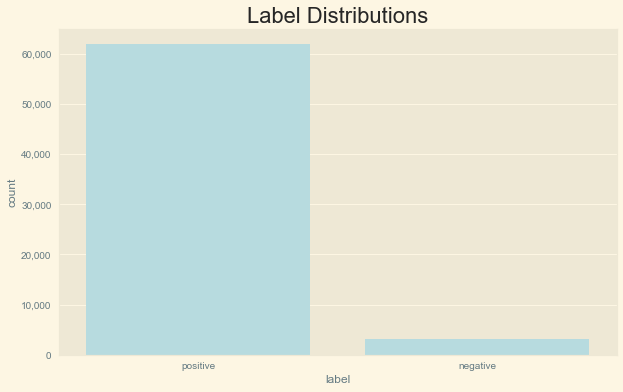

In [27]:
#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#plot data
g =sns.countplot(x='label', data = df,order = ['positive', 'negative'], color='powderblue')

#Set plot aesthetics
g.set_title('Label Distributions', fontsize = 22)
g.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()]);

## Distribution of word counts for positive and negative reviews

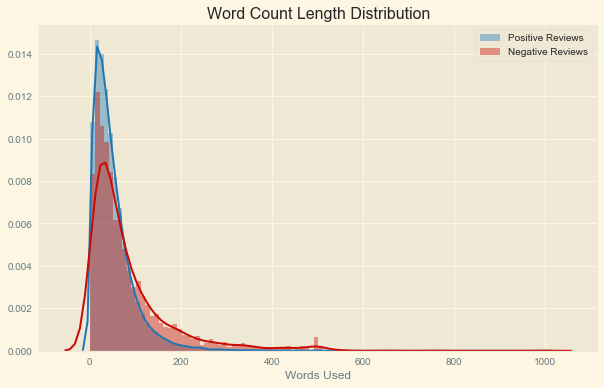

In [28]:
#Create pos/negative df's
pos_df = df[df.label == 'positive']
neg_df = df[df.label == 'negative']

#Create pos/neg corpora
pos_comments = pos_df['comments'].tolist()
neg_comments = neg_df['comments'].tolist()

#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#Plot Histograms for word count
sns.distplot(pos_df.word_count, kde = True, bins = 100, color = 'tab:blue', ax=ax)
sns.distplot(neg_df.word_count, kde = True, bins = 100, color = 'r', ax=ax)

#Set plot aesthetics
ax.legend(labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews'], frameon = True);
ax.set_title('Word Count Length Distribution')
ax.set_xlabel('Words Used');

## Word clouds and frequency counts of positive and negative reviews

In [29]:
#Import wordcloud libraries 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#Import stopwords
from nltk.corpus import stopwords, wordnet
stop_words = stopwords.words('english')

#Add additional stop words
stop_words.extend(['airbnb','website hidden by airbnb'])

#Import libraries for word count visualization
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer

### Postive Reviews 

**WordCloud**

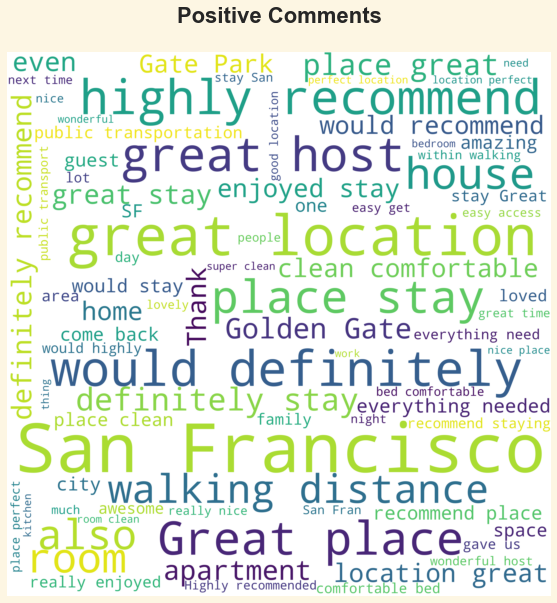

In [30]:
#Create wordcloud for postive reviews
wordcloud = WordCloud(max_font_size=500, max_words=80, background_color="white", stopwords=stop_words,
                      width= 4000, height = 4000).generate(str(pos_comments))

#Plot data and set plot aesthetics
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Positive Comments\n', fontsize=22, fontweight='bold')
plt.show()

**Positive Word Frequency Distributions**

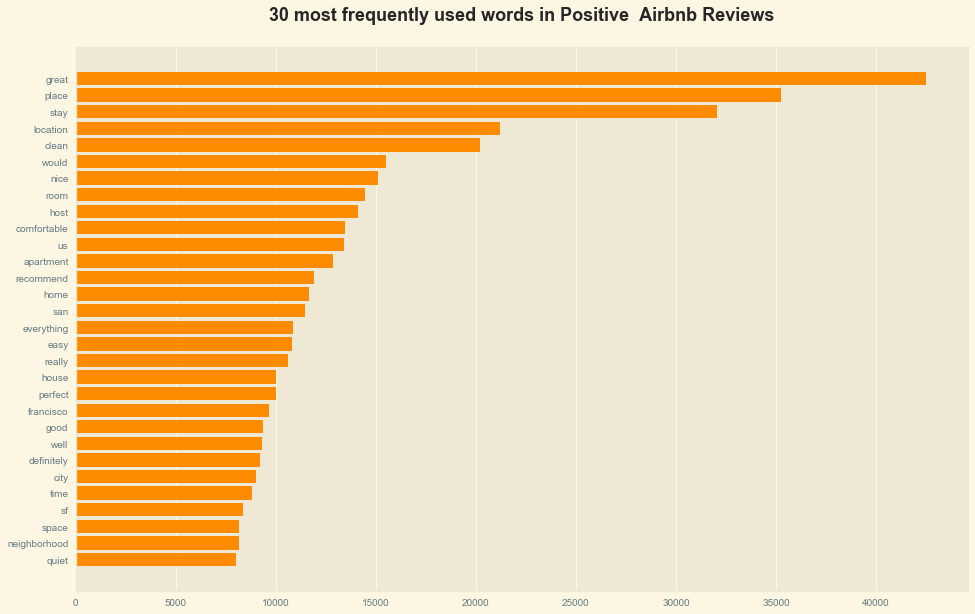

In [31]:
#Vectorize comments and also remove stop words
cv = CountVectorizer(stop_words=stop_words)
positive_docs = cv.fit_transform(pos_comments)
features = cv.get_feature_names()

#Preparing the plot
plt.figure(figsize=(16,10))
plt.title('30 most frequently used words in Positive  Airbnb Reviews\n', fontsize = 18, fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30, orient='h', color = 'darkorange')
visualizer.fit(positive_docs)
visualizer.poof;

### Negative Reviews

**WordCloud**

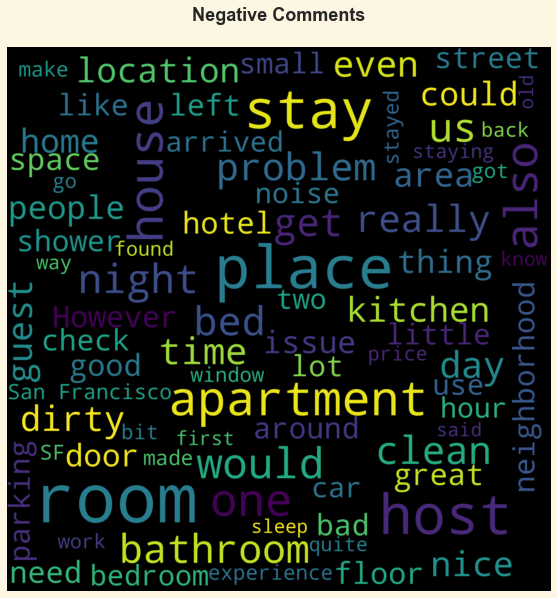

In [32]:
#Create wordcloud for postive reviews
wordcloud = WordCloud(max_font_size=500, max_words=80, background_color="black",stopwords=stop_words,
                      width= 4000, height = 4000).generate(str(neg_comments))

#Plot data and set plot aesthetics
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Negative Comments\n', fontsize=18, fontweight='bold')
plt.show()

**Negative Word Frequency Distributions**

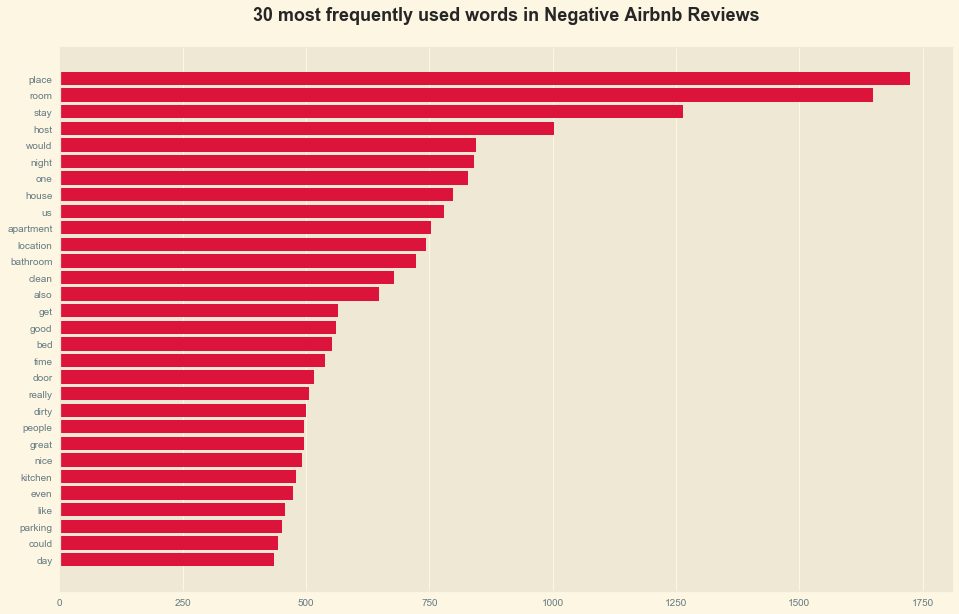

In [33]:
#Vectorize comments and also remove stop words
cv = CountVectorizer(stop_words=stop_words)
negative_docs = cv.fit_transform(neg_comments)
features = cv.get_feature_names()

#Preparing the plot
plt.figure(figsize=(16,10))
plt.title('30 most frequently used words in Negative Airbnb Reviews\n', fontsize = 18, fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30, orient='h',color='crimson')
visualizer.fit(negative_docs)
visualizer.poof;

# Topic Modeling for Positive Reviews

## Import libraries

In [40]:
# Gensim
from gensim import models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Import spacy for lemmatization
from spacy.lang.en import English
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

#Reg exp
import re

#LDA model plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt

## Data Preparation

### Functions for data cleaning, tokenization, and lemmatization

In [35]:
#Raw data tokenizer/simple processor 
def tokenizer(raw_reviews):
    """
    Takes raw text data.
    Yields a tokenized version of raw data w/ punctuation removed and all characters in lowercase
    """
    for review in raw_reviews:
        yield(gensim.utils.simple_preprocess(review, deacc=True))
        
#Clean up raw tokens
def remove_stopwords(tokens):
    """
    Remove stopwords and words < 3 characters in length from tokenized comments
    """
    tokens = [tokens.remove(token) if len(token) <3 else token for token in tokens] 
    tokens = [token for token in tokens if token] #Remove None from tokens
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in tokens]

#Lemmatize cleaned tokens
def lemmatization(cleaned_tokens, pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    """
    Lemmatize CLEANED tokens with specified pos tags and append to lemmatized_text. 
    Default pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV'] 
    """
    for item in cleaned_tokens:
        doc = nlp(" ".join(item))
        lemmatized_text.append([token.lemma_ for token in doc if token.pos_ in pos_tags])
    return lemmatized_text

#Create bigrams
def bigrams(tokens):
    return[bigram_mod[token] for token in tokens]

#Create trigrams
def trigrams(tokens):
    return[trigram_mod[bigram_mod[token]] for token in tokens]

### Clean-up raw data. Create bi & trigrams

**Tokenize raw comments**

In [36]:
#Tokenize pos_comments and remove puncuation
pos_tokens = list(tokenizer(pos_comments))

**Create bigram and trigram models**

In [37]:
#Build bigram and trigram models
bigram = gensim.models.Phrases(pos_tokens,min_count=5, threshold=100)#Might need to increse with full data set
trigram = gensim.models.Phrases(bigram[pos_tokens], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

Remove stopwords, create trigrams, and lemmatize

In [38]:
#Remove stopwords from pos_tokens
pos_tokens_clean = remove_stopwords(pos_tokens)

#Create trigrams from cleaned tokens
pos_trigrams = trigrams(pos_tokens_clean)

#Init spacy 'en' model keeping only tagger component 
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

#Init empty list to append lemmatized tokens to
lemmatized_text = []

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(list(pos_trigrams),pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

#Check
print(data_lemmatized[0])

['wonderful', 'get', 'early', 'even', 'finish', 'clean', 'try', 'best', 'clean', 'provide', 'many', 'help', 'nice', 'person', 'great', 'choose', 'host']


### Create Bag of Words and normalize with TF-IDF

**Create bow_corpus**

In [39]:
#Create dictionary of words from lemmatized data
dictionary = corpora.Dictionary(documents=data_lemmatized)

#Filter dictionary and remove words that apppear in < 15 documents and in more than 50% of the documents
dictionary.filter_extremes(no_below=15, no_above=0.5)

#Create BoW and view # of unique words
bow_corpus = [dictionary.doc2bow(text) for text in data_lemmatized]
print('Number of unique words in dictionary for positive reviews:', len(dictionary))

#Preview Bag Of Words
bow_doc_1 = bow_corpus[0]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]], bow_doc_1[i][1]))

Number of unique words in dictionary for positive reviews: 2868
Word 0 ("best") appears 1 time.
Word 1 ("choose") appears 1 time.
Word 2 ("clean") appears 2 time.
Word 3 ("early") appears 1 time.
Word 4 ("even") appears 1 time.
Word 5 ("finish") appears 1 time.
Word 6 ("get") appears 1 time.
Word 7 ("great") appears 1 time.
Word 8 ("help") appears 1 time.
Word 9 ("host") appears 1 time.
Word 10 ("many") appears 1 time.
Word 11 ("nice") appears 1 time.
Word 12 ("person") appears 1 time.
Word 13 ("provide") appears 1 time.
Word 14 ("try") appears 1 time.
Word 15 ("wonderful") appears 1 time.


**Compute term frequency in bow_corpus and normalize w/ TF-IDF**

In [41]:
#Init TfidfModel
tfidf = models.TfidfModel(bow_corpus)

#Transform bow_corpus with tfidf
corpus_tfidf = tfidf[bow_corpus]

#Check first document
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3629577326803695),
 (1, 0.34573698724927776),
 (2, 0.1762514046083808),
 (3, 0.2925185331167537),
 (4, 0.18963835390263814),
 (5, 0.4333414245113984),
 (6, 0.18081062562426117),
 (7, 0.05602122974037468),
 (8, 0.22980537381399316),
 (9, 0.09512173217808757),
 (10, 0.21983160538117597),
 (11, 0.11741419102623668),
 (12, 0.28333272903451534),
 (13, 0.20352871941558012),
 (14, 0.3109296448945211),
 (15, 0.1736902827302036)]


## Topic Modeling with LDA

Optimal Number of topics based on optimal coherence score

In [68]:
def get_coherence_values(dictionary, corpus, texts, max_topics, start=2, step=3):
    """
    Compute the coherence score for different LDA models
    of different topic number
    ----------------------------------------------------
    PARAMETERS:
    - dictionary : Gensim dictionary
    - corpus : Gensim corpus
    - texts : List of input texts
    - limit : Max num of topics 
    """
    coherence_scores = []
    model_list = []
    for topics in range(start, max_topics, step):
        model = gensim.models.LdaMulticore(corpus = corpus, num_topics=topics,workers=3, id2word=dictionary, random_state=24)
        model_list.append(model)
        coherence_model = CoherenceModel(model = model, texts=texts, dictionary=dictionary)
        coherence_scores.append(coherence_model.get_coherence())
    return model_list, coherence_scores

In [69]:
models, scores = get_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, 
                                                    texts=data_lemmatized, start=2, max_topics=20, step=2)


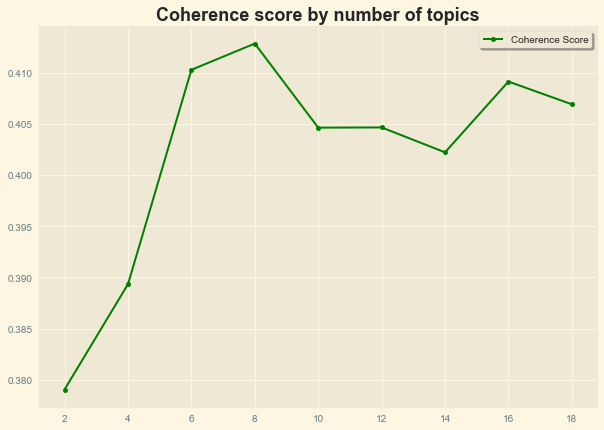

Coherence Score for LDA w/ 2 topics: 0.379
Coherence Score for LDA w/ 4 topics: 0.389
Coherence Score for LDA w/ 6 topics: 0.41
Coherence Score for LDA w/ 8 topics: 0.413
Coherence Score for LDA w/ 10 topics: 0.405
Coherence Score for LDA w/ 12 topics: 0.405
Coherence Score for LDA w/ 14 topics: 0.402
Coherence Score for LDA w/ 16 topics: 0.409
Coherence Score for LDA w/ 18 topics: 0.407


In [70]:
#Set range for xaxis
start=2; max_topics=20; step=2;
x= list(range(start, max_topics, step))

#Set plot size
plt.figure(figsize=(10,7))

#Plot coherence scores
plt.plot(x,scores, label = 'Coherence Score', color='green', marker='o', linestyle='-',
      linewidth=2, markersize=5, )

plt.title('Coherence score by number of topics', fontsize = 18, fontweight='bold')
plt.legend(frameon = True, shadow = True)
plt.show();

#Print coherence scores
for m, cv in zip(x, scores):
    print('Coherence Score for LDA w/', m,'topics:', round(cv,3))

Visualize Topics

Optimal model has 6 topics selected for our data

In [71]:
optimal_model = models[3]
model_topics = optimal_model.show_topics()

#Compute LDA model perplexity
print('Optimal LDA Model Perplexity: ', optimal_model.log_perplexity(corpus_tfidf))

#View topics
print('Optimal LDA Model Topics:')
display(optimal_model.print_topics())

Optimal LDA Model Perplexity:  -7.6438069520688945
Optimal LDA Model Topics:


[(0,
  '0.024*"great" + 0.016*"place" + 0.016*"host" + 0.015*"location" + 0.013*"stay" + 0.012*"nice" + 0.012*"clean" + 0.012*"wonderful" + 0.011*"recommend" + 0.010*"comfortable"'),
 (1,
  '0.010*"great" + 0.010*"place" + 0.010*"stay" + 0.009*"location" + 0.009*"quiet" + 0.009*"clean" + 0.008*"good" + 0.008*"comfortable" + 0.007*"perfect" + 0.007*"host"'),
 (2,
  '0.011*"great" + 0.009*"location" + 0.009*"stay" + 0.009*"responsive" + 0.008*"host" + 0.008*"would" + 0.007*"place" + 0.007*"clean" + 0.007*"room" + 0.007*"helpful"'),
 (3,
  '0.015*"nice" + 0.015*"place" + 0.012*"good" + 0.011*"great" + 0.011*"location" + 0.011*"stay" + 0.011*"recommend" + 0.010*"awesome" + 0.009*"close" + 0.009*"host"'),
 (4,
  '0.009*"stay" + 0.009*"great" + 0.009*"would" + 0.008*"place" + 0.008*"home" + 0.007*"definitely" + 0.007*"recommend" + 0.007*"back" + 0.007*"lovely" + 0.007*"location"'),
 (5,
  '0.009*"great" + 0.009*"place" + 0.008*"good" + 0.008*"clean" + 0.008*"stay" + 0.008*"room" + 0.007*"nic

In [72]:
#Create plot
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(optimal_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.047821 -0.000259       1        1  19.577799
0      0.046833  0.022865       2        1  13.547593
3      0.017910  0.031581       3        1  12.479689
7      0.026589 -0.046628       4        1  11.423362
4     -0.009723 -0.037566       5        1  11.363007
5     -0.043909  0.018743       6        1  10.822963
1      0.005547 -0.002902       7        1  10.621041
2      0.004574  0.014167       8        1  10.164548, topic_info=            Term         Freq        Total Category  logprob  loglift
7          great  2590.000000  2590.000000  Default  30.0000  30.0000
89       awesome   545.000000   545.000000  Default  29.0000  29.0000
417   responsive   568.000000   568.000000  Default  28.0000  28.0000
126  hospitality   284.000000   284.000000  Default  27.0000  27.0000
9           host  1782.000000  1782.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
95          home   109.460640  1230.688477   Topic8  -5.3436  -0.1335
159    beautiful   105.179329  1098.108032   Topic8  -5.3835  -0.0594
113         city   101.859596  1007.703247   Topic8  -5.4155  -0.0056
33          good   110.396812  1547.537720   Topic8  -5.3350  -0.3541
121        quiet   100.963516  1076.621826   Topic8  -5.4244  -0.0806

[715 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1407      1  0.045728        abode
1407      2  0.045728        abode
1407      3  0.777377        abode
1407      4  0.091456        abode
639       1  0.119280   absolutely
...     ...       ...          ...
101       7  0.096359        would
101       8  0.117990        would
1861      2  0.717127  zain_duncan
1861      3  0.159362  zain_duncan
1861      5  0.079681  zain_duncan

[2364 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 4, 8, 5, 6, 2, 3])

Finding the dominant topic in each review

In [73]:
def topic_finder(ldamodel, corpus, text):
    """Returns dataframe contianing dominant topic 
    for each individual review for positive reviews"""
    topics = pd.DataFrame()
    
    #Get main topic of each doc
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        
        #Get the dominant topic, percent contribution, and keywords for each document
        for j,(topic_num, prop_topic) in enumerate(row):
            if j == 0: #Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics = topics.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    topics.columns = ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']
    
    #Append original comments to pos_topics
    comments = pd.Series(text)
    topics = pd.concat([topics, comments], axis = 1)
    return topics   

In [74]:
positive_topics = topic_finder(optimal_model,corpus_tfidf, pos_comments)

#Format positive_topics
positive_topics.columns = ['Dominant_Topic', 'Topic%_Contribution','Keywords', 'Reviews']

In [75]:
#Check
display(positive_topics.head(1))

,Dominant_Topic,Topic%_Contribution,Keywords,Reviews
0,7.0,0.8123,"great, amazing, thank, view, stay, place, location, host, well, perfect","It was wonderful. we got there early, Brendan even not finish cleaning. but he try his best to clean,and provide many helps. Brendan is a super nice person, it is so great to choose him as the host"


Topic Distribution across all documents

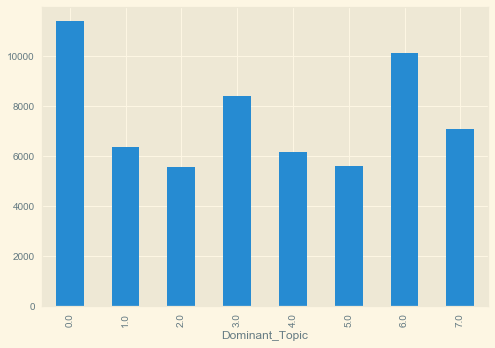

In [76]:
positive_topics.groupby('Dominant_Topic')['Dominant_Topic'].count().plot(kind = 'bar')

Find most representative document for each positive topic

In [77]:
top_docs = positive_topics.groupby('Dominant_Topic')['Topic%_Contribution'].nlargest(5).reset_index()

rows = list(top_docs['level_1'])
positive_topics.iloc[(rows)]

,Dominant_Topic,Topic%_Contribution,Keywords,Reviews
40081,0.0,0.8939,"great, place, host, location, stay, nice, clean, wonderful, recommend, comfortable",We had a great stay in the Mission at Deidre's place. It's very easy to find and parking is available at a garage right at the end of the block ($27/day). Deidre made us feel very welcome with plenty of advice about where to eat in the neighborhood and even had the place ready to go early in the day so my family could check-in as soon as we arrived.
1854,0.0,0.8931,"great, place, host, location, stay, nice, clean, wonderful, recommend, comfortable","Jay's place is in a fantastic location — in a great neighbourhood and close to lots of public transit options. It's also a quiet and beautiful house to stay in, and we really appreciated how responsive Jay was when we had questions."
46162,0.0,0.8896,"great, place, host, location, stay, nice, clean, wonderful, recommend, comfortable","Fantastic apartment - spacious and comfortable, and had the right amenities. Highly recommend! We would come back again."
34019,0.0,0.8864,"great, place, host, location, stay, nice, clean, wonderful, recommend, comfortable",I really enjoyed my stay here. Beth was a fantastic host and made me feel very welcome.
3813,0.0,0.8863,"great, place, host, location, stay, nice, clean, wonderful, recommend, comfortable","Very well-located and reasonably priced apartment (for SF standards). Great communication from Rebecca, good amenities and items in the apartment. Parking is particularly handy if you have a car. Definitely recommended."
47797,1.0,0.9108,"great, place, stay, location, quiet, clean, good, comfortable, perfect, host","Very nice place, close to many attractions and next to a park. It was very clean and you also get a full kitchen and backyard. Juanjuan is very helpful and friendly. I would definitely use this Airbnb again."
24420,1.0,0.9045,"great, place, stay, location, quiet, clean, good, comfortable, perfect, host",amazing location right in the heart of the city. very clean and extremely comfortable bed. thanks for an awesome stay
10377,1.0,0.8932,"great, place, stay, location, quiet, clean, good, comfortable, perfect, host","Emily is super attentive and her place is just perfect. I made the mistake of renting a bike to get there, just Lyft or bus and you should be fine up the hill. The extremely clean and super awesome house + extraordinary views are worth it!"
42567,1.0,0.8925,"great, place, stay, location, quiet, clean, good, comfortable, perfect, host","Rigo was a wonderful host! He is kind, prompt and helped me with every aspect of my reservation and stay. His place is very clean, great layout and spacious. The location was perfect for a short ride into the city every morning for the conference I was attending. He did everything to make me feel at home and make sure I enjoyed my time in San Fransico. I wouldn’t hesitate to stay at Rigo's home again."
5836,1.0,0.8919,"great, place, stay, location, quiet, clean, good, comfortable, perfect, host",Zack was very accommodating and this room was very comfortable. The location made it easy to get downtown quickly. I highly recommend his place.


# Negative Reviews

## Tokenize and format negative reviews

In [78]:
neg_tokens = list(tokenizer(neg_comments))

print(neg_tokens[1])

['the', 'location', 'was', 'great', 'yes', 'it', 'did', 'have', 'great', 'view', 'but', 'it', 'was', 'dirty', 'the', 'first', 'thing', 'do', 'anywhere', 'is', 'pull', 'back', 'the', 'top', 'sheet', 'there', 'was', 'bunch', 'of', 'crunchy', 'things', 'and', 'hair', 'on', 'the', 'sheets', 'and', 'pillow', 'case', 'the', 'top', 'sheet', 'was', 'torn', 'in', 'several', 'places', 'and', 'the', 'pillow', 'cases', 'had', 'holes', 'in', 'them', 'they', 'were', 'not', 'changed', 'had', 'no', 'place', 'to', 'stay', 'so', 'brushed', 'them', 'off', 'and', 'spent', 'two', 'uncomfortable', 'nights', 'in', 'the', 'house', 'the', 'bathtub', 'shower', 'was', 'dirty', 'and', 'had', 'black', 'mold', 'around', 'where', 'the', 'wall', 'met', 'the', 'tub', 'the', 'sink', 'was', 'dirty', 'and', 'mean', 'they', 'hadn', 'been', 'cleaned', 'in', 'long', 'time', 'the', 'toilet', 'was', 'filthy', 'inside', 'and', 'out', 'the', 'little', 'plastic', 'container', 'to', 'put', 'my', 'bathroom', 'stuff', 'in', 'on', '

## Create bi and trigram models using neg_tokens

In [79]:
#Build bigram and trigram models
bigram = gensim.models.Phrases(neg_tokens,min_count=5, threshold=10)
trigram = gensim.models.Phrases(bigram[neg_tokens], threshold=10)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

## Remove stopwords from neg tokens and create trigrams

In [80]:
neg_tokens_cleaned = remove_stopwords(neg_tokens)

print(neg_tokens_cleaned[1])

['location', 'great', 'yes', 'great', 'view', 'dirty', 'first', 'thing', 'anywhere', 'pull', 'back', 'top', 'sheet', 'bunch', 'crunchy', 'things', 'hair', 'sheets', 'pillow', 'case', 'top', 'sheet', 'torn', 'several', 'places', 'pillow', 'cases', 'holes', 'changed', 'place', 'stay', 'brushed', 'spent', 'two', 'uncomfortable', 'nights', 'house', 'bathtub', 'shower', 'dirty', 'black', 'mold', 'around', 'wall', 'met', 'tub', 'sink', 'dirty', 'mean', 'cleaned', 'long', 'time', 'toilet', 'filthy', 'inside', 'little', 'plastic', 'container', 'put', 'bathroom', 'stuff', 'counter', 'gross', 'would', 'never', 'put', 'toothpaste', 'toothbrush', 'heat', 'house', 'degrees', 'night', 'went', 'walgreens', 'purchased', 'small', 'heater', 'use', 'night', 'two', 'nights', 'stayed', 'offered', 'coffee', 'woke', 'went', 'kitchen', 'barely', 'one', 'cup', 'left', 'machine', 'person', 'house', 'guess', 'quarter', 'pot', 'share', 'owner', 'get', 'disappointed', 'would', 'never', 'stay', 'recommend', 'anyone

## Create bi and trigrams, Lemmatize trigrams

In [81]:
neg_trigrams = trigrams(neg_tokens_cleaned)

print(neg_trigrams[1])

['location', 'great', 'yes', 'great', 'view', 'dirty', 'first_thing', 'anywhere', 'pull', 'back', 'top_sheet', 'bunch', 'crunchy', 'things', 'hair', 'sheets', 'pillow', 'case', 'top_sheet', 'torn', 'several', 'places', 'pillow', 'cases', 'holes', 'changed', 'place', 'stay', 'brushed', 'spent', 'two', 'uncomfortable', 'nights', 'house', 'bathtub', 'shower', 'dirty', 'black', 'mold', 'around', 'wall', 'met', 'tub', 'sink', 'dirty', 'mean', 'cleaned', 'long_time', 'toilet', 'filthy', 'inside', 'little', 'plastic', 'container', 'put', 'bathroom', 'stuff', 'counter', 'gross', 'would_never', 'put', 'toothpaste', 'toothbrush', 'heat', 'house', 'degrees', 'night', 'went', 'walgreens', 'purchased', 'small', 'heater', 'use', 'night', 'two_nights', 'stayed', 'offered', 'coffee', 'woke', 'went', 'kitchen', 'barely', 'one', 'cup', 'left', 'machine', 'person', 'house', 'guess', 'quarter', 'pot', 'share', 'owner', 'get', 'disappointed', 'would_never', 'stay', 'recommend', 'anyone']


In [82]:
# Initialize spacy 'en' model keeping only tagger component 
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

lemmatized_text = []

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(list(neg_trigrams),pos_tags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [83]:
#check
print((data_lemmatized[1]))

['location', 'great', 'great', 'view', 'dirty', 'first_thing', 'anywhere', 'pull', 'back', 'bunch', 'crunchy', 'thing', 'hair', 'sheet', 'pillow', 'case', 'tear', 'several', 'place', 'pillow', 'case', 'hole', 'change', 'place', 'stay', 'brush', 'spend', 'uncomfortable', 'night', 'house', 'bathtub', 'shower', 'dirty', 'black', 'mold', 'meet', 'tub', 'sink', 'dirty', 'mean', 'clean', 'long_time', 'toilet', 'filthy', 'little', 'plastic', 'container', 'put', 'bathroom', 'stuff', 'counter', 'gross', 'would_never', 'put', 'toothpaste', 'toothbrush', 'heat', 'house', 'degree', 'night', 'go', 'purchase', 'small', 'heater', 'use', 'night', 'stay', 'offer', 'coffee', 'wake', 'go', 'kitchen', 'barely', 'cup', 'leave', 'machine', 'person', 'house', 'guess', 'quarter', 'pot', 'share', 'owner', 'get', 'disappoint', 'stay', 'recommend']


## Bag of Words

In [84]:
dictionary = corpora.Dictionary(documents=data_lemmatized)
print(len(dictionary))

#Filter pos_lemmatized. Remove tokens that apppear in <15 documents and in more than 50% of the documents
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(text) for text in data_lemmatized]


print('Number of unique words in dictionary for positive reviews:', len(dictionary))

#Preview Bag Of Words for our sample preprocessed document.
bow_doc_1 = bow_corpus[1]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]], bow_doc_1[i][1]))

6646
Number of unique words in dictionary for positive reviews: 1041
Word 11 ("change") appears 1 time.
Word 41 ("get") appears 1 time.
Word 43 ("go") appears 2 time.
Word 51 ("leave") appears 1 time.
Word 54 ("meet") appears 1 time.
Word 58 ("offer") appears 1 time.
Word 61 ("place") appears 2 time.
Word 69 ("sheet") appears 1 time.
Word 70 ("shower") appears 1 time.
Word 76 ("stay") appears 3 time.
Word 80 ("thing") appears 1 time.
Word 87 ("use") appears 1 time.
Word 93 ("anywhere") appears 1 time.
Word 94 ("back") appears 1 time.
Word 95 ("barely") appears 1 time.
Word 96 ("bathroom") appears 1 time.
Word 97 ("bathtub") appears 1 time.
Word 98 ("black") appears 1 time.
Word 99 ("bunch") appears 1 time.
Word 100 ("case") appears 2 time.
Word 101 ("clean") appears 1 time.
Word 102 ("coffee") appears 1 time.
Word 103 ("counter") appears 1 time.
Word 104 ("cup") appears 1 time.
Word 105 ("dirty") appears 3 time.
Word 106 ("disappoint") appears 1 time.
Word 107 ("filthy") appears 1 time

TF-IDF

In [85]:
from gensim import models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

#check
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.06808273672420555),
 (1, 0.08370805824987969),
 (2, 0.20028326635652682),
 (3, 0.20325062393903745),
 (4, 0.0659363476125411),
 (5, 0.20735561978667433),
 (6, 0.07259590349887343),
 (7, 0.05150233842317669),
 (8, 0.050146658366662156),
 (9, 0.08514540274243183),
 (10, 0.0811181801815181),
 (11, 0.07272266230900608),
 (12, 0.04028821918661758),
 (13, 0.05453606366144091),
 (14, 0.09227752594223698),
 (15, 0.07812838536952026),
 (16, 0.20028326635652682),
 (17, 0.09700002063033228),
 (18, 0.14011858037919692),
 (19, 0.10014163317826341),
 (20, 0.05613989222259917),
 (21, 0.09456196029790398),
 (22, 0.04292033743480671),
 (23, 0.08032642637563912),
 (24, 0.10242606753393042),
 (25, 0.07436267609503472),
 (26, 0.10242606753393042),
 (27, 0.08564920444200666),
 (28, 0.08032642637563912),
 (29, 0.1012502363278065),
 (30, 0.1820408620126732),
 (31, 0.09227752594223698),
 (32, 0.07352533995347554),
 (33, 0.07170162262604594),
 (34, 0.07325407294549166),
 (35, 0.08780645621142062),
 (36,

Optimal Number of topics based on optimal coherence score

In [86]:
models, scores = get_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, 
                                                    texts=data_lemmatized, start=2, max_topics=20, step=2)


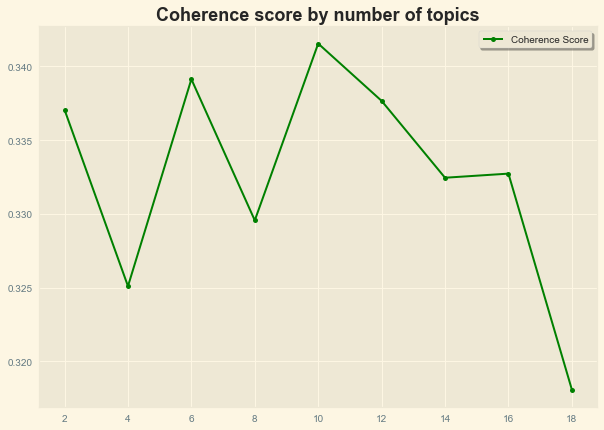

Coherence Score for LDA w/ 2 topics: 0.337
Coherence Score for LDA w/ 4 topics: 0.325
Coherence Score for LDA w/ 6 topics: 0.339
Coherence Score for LDA w/ 8 topics: 0.33
Coherence Score for LDA w/ 10 topics: 0.342
Coherence Score for LDA w/ 12 topics: 0.338
Coherence Score for LDA w/ 14 topics: 0.332
Coherence Score for LDA w/ 16 topics: 0.333
Coherence Score for LDA w/ 18 topics: 0.318


In [87]:
#Set range for xaxis
start=2; max_topics=20; step=2;
x= list(range(start, max_topics, step))

#Set plot size
plt.figure(figsize=(10,7))

#Plot coherence scores
plt.plot(x,scores, label = 'Coherence Score', color='green', marker='o', linestyle='-',
      linewidth=2, markersize=5, )

plt.title('Coherence score by number of topics', fontsize = 18, fontweight='bold')
plt.legend(frameon = True, shadow = True)
plt.show();

#Print coherence scores
for m, cv in zip(x, scores):
    print('Coherence Score for LDA w/', m,'topics:', round(cv,3))

Visualize Topics

Optimal model has 10 topics selected for our data

In [88]:
optimal_model = models[4]
model_topics = optimal_model.show_topics()

#Compute LDA model perplexity
print('Optimal LDA Model Perplexity: ', optimal_model.log_perplexity(corpus_tfidf))

#View topics
print('Optimal LDA Model Topics:')
display(optimal_model.print_topics())

Optimal LDA Model Perplexity:  -8.523574373463399
Optimal LDA Model Topics:


[(0,
  '0.008*"room" + 0.008*"place" + 0.008*"stay" + 0.007*"good" + 0.006*"location" + 0.005*"clean" + 0.005*"host" + 0.005*"great" + 0.005*"bed" + 0.005*"dirty"'),
 (1,
  '0.009*"room" + 0.007*"place" + 0.007*"stay" + 0.007*"good" + 0.006*"location" + 0.006*"street" + 0.006*"host" + 0.005*"apartment" + 0.005*"get" + 0.005*"thing"'),
 (2,
  '0.008*"room" + 0.007*"stay" + 0.006*"place" + 0.006*"good" + 0.006*"night" + 0.006*"bathroom" + 0.006*"apartment" + 0.006*"problem" + 0.006*"great" + 0.005*"guest"'),
 (3,
  '0.008*"room" + 0.008*"stay" + 0.007*"place" + 0.007*"apartment" + 0.006*"clean" + 0.006*"convenient" + 0.006*"host" + 0.006*"night" + 0.005*"location" + 0.005*"comfortable"'),
 (4,
  '0.012*"place" + 0.009*"complaint" + 0.009*"stay" + 0.006*"host" + 0.006*"nice" + 0.006*"room" + 0.006*"kitchen" + 0.005*"bed" + 0.005*"problem" + 0.005*"would"'),
 (5,
  '0.008*"great" + 0.008*"place" + 0.007*"room" + 0.007*"host" + 0.007*"clean" + 0.006*"stay" + 0.006*"go" + 0.006*"bathroom" + 

In [89]:
#Create plot
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(optimal_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.002367 -0.003134       1        1  20.359426
3     -0.000075 -0.000214       2        1  14.970265
0      0.003001 -0.004592       3        1  13.122894
8     -0.016084  0.005351       4        1   8.829283
2     -0.012222  0.003266       5        1   8.298027
7      0.019347  0.037673       6        1   8.067247
1     -0.003068  0.003614       7        1   7.782445
4     -0.014555 -0.017552       8        1   7.250982
5     -0.012672 -0.002019       9        1   6.375881
6      0.038694 -0.022393      10        1   4.943546, topic_info=          Term       Freq      Total Category  logprob  loglift
149    arrival  20.000000  20.000000  Default  30.0000  30.0000
341  complaint  29.000000  29.000000  Default  29.0000  29.0000
61       place  93.000000  93.000000  Default  28.0000  28.0000
63     problem  61.000000  61.000000  Default  27.0000  27.0000
108      great  55.000000  55.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
41         get   2.448635  53.103401  Topic10  -5.5469  -0.0696
89        work   2.220063  36.669109  Topic10  -5.6449   0.2027
45        host   2.532776  81.426216  Topic10  -5.5131  -0.4633
167       nice   2.397526  58.231194  Topic10  -5.5680  -0.1829
90       would   2.239005  56.991554  Topic10  -5.6364  -0.2298

[713 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
245       1  0.164423   able
245       2  0.109615   able
245       3  0.219231   able
245       4  0.054808   able
245       5  0.109615   able
...     ...       ...    ...
727       8  0.074135  wrong
727       9  0.148271  wrong
727      10  0.074135  wrong
795       1  0.382032   yell
795       4  0.191016   yell

[2882 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 1, 9, 3, 8, 2, 5, 6, 7])

Finding the dominant topic in each review

In [90]:
negative_topics = topic_finder(optimal_model,corpus_tfidf, neg_comments)

#Format positive_topics
negative_topics.columns = ['Dominant_Topic', 'Topic%_Contribution','Keywords', 'Reviews']

In [91]:
#Expand pandas to view entirety of Reviews
pd.set_option('display.max_colwidth',None)

#Check
display(negative_topics.head())

,Dominant_Topic,Topic%_Contribution,Keywords,Reviews
0,3.0,0.5255,"room, stay, place, apartment, clean, convenient, host, night, location, comfortable","Our San Francisco stay with Sharna was very disappointing My husband has mobility problems, so I checked beforehand to find out if the stairs to her second-floor condo were steep. Sharna said no. But it turned out that her second floor condo was actually on the third floor and required my husband to climb 50 steps to get to our bedroom! Key problems: First, rang the doorbell (which didn’t work). After we banged for a while on the outside door, Sharna appeared. No smile or hello. She told us she was in the middle of a phone call and would soon come back down to help with baggage. She gave us a set of keys that didn’t work. So we went back to ringing the inoperative doorbell & banging on the door until Sharna came down again. When I told her that three different people were unable to open the door, she denied it & said no one else had ever had difficulty in using them. I asked her what to do if we couldn't open the door. Sharna’s response: “I don’t know what to tell you.” Finally I asked if she had another set of keys. She did, and this set worked. Sharna continued to argue that the doorbell did in fact work, but I gave up on arguing with her. We climbed the 50 steps, with my husband increasingly exhausted. The bed was very comfortable, but there was a dresser filled with Sharna’s things and no decent chair to sit in. Since we were booked for 7 days, I asked her for the use of a dresser. She didn’t offer to clear out the dresser but asked instead how many drawers we needed. Sharna told us that a cleaner came once a week but didn’t change the sheets. Sharna told us that she was going off –to LA, I think, and that we would have the place to ourselves. After she left, we discovered that the bed sheet and the pillowcase had reddish brown stains on them. There was no bath mat in the shower (so my husband, who has balance problems, couldn’t use it). The two tiny wastebaskets were unlined, and the carpet had dirt stains on it. If Jim and I were l0 years younger, we would have immediately made plans to move. But we were exhausted, and thought that getting a new place would take time away from our plans to meet our friends and relatives in and around the city. Sharna’s place wasn’t exactly a condo from hell – but it came close. As for Sharna, I would rate her hosting abilities as close to zero (no stars). She was unkind, indifferent, unhelpful and dishonest about the 50 stair 3rd floor condo. Esther and Jim"
1,8.0,0.5569,"room, place, host, stay, problem, check, really, nice, night, need","The location was great, yes it did have a great view, but it was dirty. The first thing I do anywhere is pull back the top sheet. There was a bunch of crunchy things and hair on the sheets and pillow case. The top sheet was torn in several places and the pillow cases had holes in them. They were not changed. I had no place to stay so I brushed them off and spent two uncomfortable nights in the house. The bathtub/shower was dirty and had black mold around where the wall met the tub. The sink was dirty and I mean they hadn't been cleaned in a long time. The toilet was filthy inside and out. The little plastic container to put my bathroom stuff in on the counter was gross. I would never have put my toothpaste and toothbrush in it. There is no heat in the house and it was 52 degrees at night. I went to Walgreens and purchased a small heater to use at night for the two nights I stayed there. I was offered coffee when I woke up so I went out to the kitchen and there was barely one cup left in the machine. I was the only person at the house and I guess a quarter pot to share with the owner is all you get. I was very disappointed. I would never stay there again or recommend it to anyone"
2,9.0,0.7315,"host, stay, room, bathroom, dirty, parking, clean, place, nice, apartment","Host was very friendly. The block 

Topic Distribution across all documents

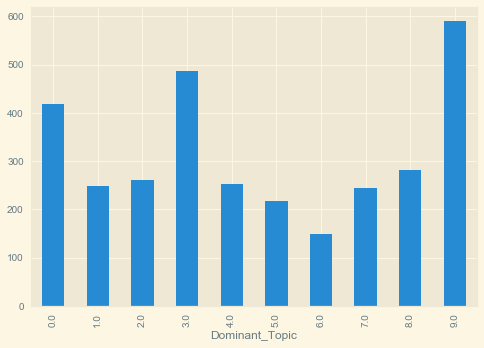

In [92]:
negative_topics.groupby('Dominant_Topic')['Dominant_Topic'].count().plot(kind = 'bar')

Find most representative document for each positive topic

In [93]:
top_docs = negative_topics.groupby('Dominant_Topic')['Topic%_Contribution'].nlargest(5).reset_index()

rows = list(top_docs['level_1'])
negative_topics.iloc[(rows)]

,Dominant_Topic,Topic%_Contribution,Keywords,Reviews
209,0.0,0.9099,"room, place, stay, good, location, clean, host, great, bed, dirty","Before booking any place with Maria, ask her for updated unstaged pictures of her rooms. When I arrived and after I had looked through some of her other rooms, it became evident that all her rooms are completely staged. Upon arrival, I was told that the wooden table was ""broken by a previous guest"" and replaced by a cheap aluminium table, and I also found that the carpet, two nightstands, and the attached twin mattress were nowhere to be found, and that the drapes and walls looked completely different. Also the table itself was not clean (I had to wipe it down as it had many stains), there was a blood stain on one of the blankets, the toilet paper and soap was not provided (a cleaner had to come by that evening to drop it off after I had complained about all the inconsistencies with Airbnb), the dresser was barely operable (bad carpentry job I suppose), and there were no coathangers so the closet was useless (I asked for some and got 2, which I suppose all things considered, I should be thankful for given my low expectations at this point). Airbnb will NOT protect you in this scenario - they will not help you find a new location as there is still a bed, a table, a chair, and a dresser, and will not refund you as it is not in their policy. It is up to Maria to compensate you for this business practice - I will be receiving a $50 credit two weeks after check out (coincidentally, I have two weeks to leave a review). Maria takes advantage of Airbnb's host-protecting policy, which I guess in the end makes her a shrewd businessperson, taking advantage of the system and of her guests. I was not surprised when after I had asked her cleaner if I could have some coathangers (which she/Maria graciously agreed to give me 2 of), Maria told me that if I asked for any further help from her cleaner I would have to pay her $25/hour. She will nickel and dime you for everything (also her laundry is $4.50/2.00). The place is very much a ""travelers"" hostel, meaning that there is no common area outside of the kitchen area. Everything else has been converted into living space that she rents out for even more income. While I stayed, there were at least 6, sometimes 7 other guests. There is some kitchenware but very aged - I restricted myself to simple meals and some housemates bought their own private kitchenware. The house is reasonably close to Glen Park BART, very close to an Asian supermarket, and the room itself is spacious. For this room specifically, right across from your door there is another room which is partitioned off. The person living across from me smelled really badly, and half the time the bathroom smelled atrocious too. Fortunately I stayed around the time of the forest fires so I was already prepared with a respirator mask to protect myself."
1250,0.0,0.9087,"room, place, stay, good, location, clean, host, great, bed, dirty","Location: Right off of the exit of 280, so it is very convenient. It is 15 mins walk from the Bart. Area: The neighborhood is not as nice as the part of Mission that has been gentrified. There are always homeless people hanging out around the corner of the block, but they don’t bother anybody. Laundry: There is no washing machine in the unit. While many of those homeless people live in front of the laundry mat at the end of the block, which the host suggests us to use, it is almost impossible to wash anything there. The host did offer another option to do your laundry: to order a pick up laundry service which costs about $2 per shirt. It might work if you are staying for a couple of days, but will be super inconvenient for a longer stay. Neighbor: IMPORTANT! This home is on the third floor in an old Victorian apartment. The neighbor on the second floor is very hostile to me and my roommate. We were notified about our unfriendly neighbor in the check-in guide, so we wante